# (27) Repeats only (old results)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [16]:
skip_fits = [
    'fixate2_nf-420_beta-0.15_(2023_04_27,13:57)',
    'fixate1_nf-420_beta-0.8_(2023_05_07,04:15)',
]
path = pjoin(tmp_dir, 'results_combined')
fits = []
with open(pjoin(path, 'fits.txt'), 'r') as f:
    for line in f:
        if '# computer name' in line or 'reservoir' in line:
            continue
        category, nf, beta, model = extract_info(line)
        cond = (
            category == 'fixate1' and
            beta in [0.5, 0.8, 1.0, 5.0, 'ae'] and
            not any(e in line for e in skip_fits)
        )
        if not cond:
            continue
        fits.append(line.split('\n')[0])
fits = sorted(fits)

In [17]:
fits

['fixate1_nf-420_beta-0.5_(2023_04_30,20:05)',
 'fixate1_nf-420_beta-0.8_(2023_05_13,14:52)',
 'fixate1_nf-420_beta-1.0_(2023_04_29,19:41)',
 'fixate1_nf-420_beta-5.0_(2023_05_07,08:59)',
 'fixate1_nf-420_beta-ae_(2023_05_12,07:31)',
 'vanilla_fixate1_nf-420_beta-0.5_(2023_05_07,02:51)',
 'vanilla_fixate1_nf-420_beta-0.8_(2023_05_11,02:19)',
 'vanilla_fixate1_nf-420_beta-1.0_(2023_05_07,01:18)',
 'vanilla_fixate1_nf-420_beta-5.0_(2023_05_15,07:23)',
 'vanilla_fixate1_nf-420_beta-ae_(2023_05_13,07:49)']

In [19]:
df_neural = []
for fit in fits:
    if 'reservoir' in fit or fit in skip_fits:
        continue
    category, nf, beta, tag = extract_info(fit)    
    if beta in [0.001, 20.0]:
        continue

    # load df
    _df = f"summary_{fit}.df"
    _df = pjoin(tmp_dir, 'results_combined', _df)
    _df = pd.read_pickle(_df)
    assert len(_df) == 141
    _df.insert(0, 'model', tag)
    df_neural.append(_df)

df_neural = pd.concat(df_neural).reset_index()
betas = ['ae'] + sorted([
    b for b in df_neural['beta'].unique()
    if isinstance(b, float)
])

In [21]:
_df = df_neural.loc[np.isfinite(df_neural['max_perf'])]

In [22]:
_df

,index,model,category,nf,beta,root,expt,cell,perf,max_perf,log_alpha,best_lag
17,17,cNVAE,fixate1,420,0.5,YUWEI,clu088,0,0.464414,0.646108,8.0,3
18,18,cNVAE,fixate1,420,0.5,YUWEI,clu089,0,0.588197,0.953892,4.0,1
19,19,cNVAE,fixate1,420,0.5,YUWEI,clu090,0,0.840114,0.990020,2.0,2
20,20,cNVAE,fixate1,420,0.5,YUWEI,clu095,0,0.756259,0.956606,-4.0,2
21,21,cNVAE,fixate1,420,0.5,YUWEI,clu096,0,0.732942,0.909688,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,136,AE,fixate1,420,ae,YUWEI,ytu029,19,0.327538,0.941254,-4.0,7
1406,137,AE,fixate1,420,ae,YUWEI,ytu029,20,0.245676,0.958395,-1.0,5
1407,138,AE,fixate1,420,ae,YUWEI,ytu029,21,0.342485,0.846710,-1.0,4
1408,139,AE,fixate1,420,ae,YUWEI,ytu029,22,0.621532,0.930033,-10.0,4


In [24]:
_df.groupby(['beta', 'model']).mean()

index     nf      cell      perf  max_perf  log_alpha  \
beta model                                                              
0.5  VAE    78.228571  420.0  6.466667  0.585050  0.850839  -2.961905   
     cNVAE  78.228571  420.0  6.466667  0.581698  0.850839   1.361905   
0.8  VAE    78.228571  420.0  6.466667  0.554039  0.850839  -4.028571   
     cNVAE  78.228571  420.0  6.466667  0.600963  0.850839  -2.876190   
1.0  VAE    78.228571  420.0  6.466667  0.568615  0.850839  -4.590476   
     cNVAE  78.228571  420.0  6.466667  0.575670  0.850839  -1.219048   
5.0  VAE    78.228571  420.0  6.466667  0.588683  0.850839  -5.580952   
     cNVAE  78.228571  420.0  6.466667  0.567580  0.850839  -3.152381   
ae   AE     78.228571  420.0  6.466667  0.571252  0.850839  -2.771429   
     cNAE   78.228571  420.0  6.466667  0.543870  0.850839   3.371429   

            best_lag  
beta model            
0.5  VAE    4.323810  
     cNVAE  4.190476  
0.8  VAE    4.152381  
     cNVAE  4.209524  
1.0  VAE    4.533333  
     cNVAE  4.561905  
5.0  VAE    3.952381  
     cNVAE  4.257143  
ae   AE     4.066667  
     cNAE   4.219048

In [25]:
(600 - 484) / 486

0.23868312757201646

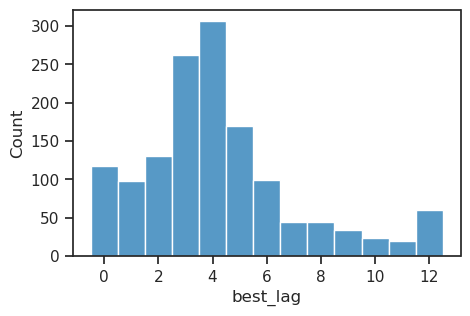

In [32]:
sns.histplot(df_neural['best_lag'], bins=np.linspace(0, 13, 14) - 0.5);

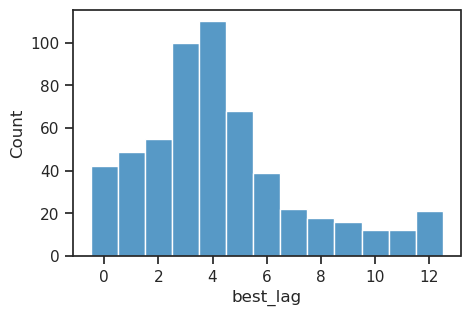

In [33]:
_df = df_neural.loc[df_neural['model'] == 'cNVAE']
sns.histplot(
    _df['best_lag'],
    bins=np.linspace(0, 13, 14) - 0.5);

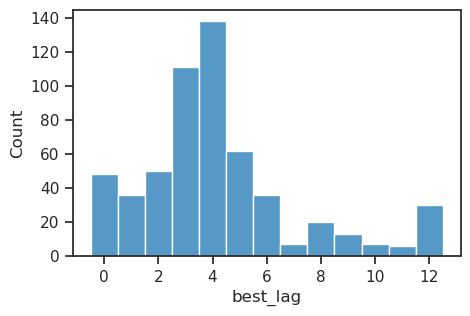

In [34]:
_df = df_neural.loc[df_neural['model'] == 'VAE']
sns.histplot(
    _df['best_lag'],
    bins=np.linspace(0, 13, 14) - 0.5);